In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import os

# Read the CSV and Perform Basic Data Cleaning

In [2]:
df = pd.read_csv(os.path.join("..", "data", "exoplanet_data.csv"))
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


# Select your features (columns)

In [3]:
# Set features. This will also be used as your x values.
target = df['koi_disposition']
data = df[['koi_fpflag_co', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_model_snr', 'koi_prad', 'koi_prad_err2', 'koi_duration_err2']]
feature_names = data.columns
data.head()

,koi_fpflag_co,koi_fpflag_nt,koi_fpflag_ss,koi_model_snr,koi_prad,koi_prad_err2,koi_duration_err2
0,0,0,0,25.8,2.83,-0.19,-0.11600
1,0,0,1,76.3,14.60,-1.31,-0.03410
2,0,0,1,505.6,33.46,-2.83,-0.00537
3,0,0,0,40.9,2.75,-0.35,-0.04200
4,0,0,0,40.2,2.77,-0.30,-0.06730


# Create a Train Test Split

Use `koi_disposition` for the y values

In [4]:
#import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
#from tensorflow.keras.utils import to_categorical

#assign x and y values
X = df.drop("koi_disposition", axis=1)
y = df["koi_disposition"]

#split training and testing data
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.8, random_state=12)

In [5]:
X_train.head()

,koi_fpflag_co,koi_fpflag_nt,koi_fpflag_ss,koi_model_snr,koi_prad,koi_prad_err2,koi_duration_err2
2544,0,0,1,415.7,7.37,-0.46,-0.0640
4563,0,1,0,6.0,1.68,-0.12,-0.5060
3569,0,0,1,1638.0,53.30,-4.58,-0.0124
6861,0,0,1,41.1,32.19,-11.28,-0.0728
2742,1,1,0,53.7,49.37,-6.86,-0.0551


In [6]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [6]:
# Scale your data
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Find the best K



k: 1, Train/Test Score: 1.000/0.816
k: 3, Train/Test Score: 0.900/0.853
k: 5, Train/Test Score: 0.889/0.856
k: 7, Train/Test Score: 0.883/0.860
k: 9, Train/Test Score: 0.881/0.863
k: 11, Train/Test Score: 0.878/0.865
k: 13, Train/Test Score: 0.876/0.864
k: 15, Train/Test Score: 0.877/0.866
k: 17, Train/Test Score: 0.878/0.866
k: 19, Train/Test Score: 0.875/0.864
k: 21, Train/Test Score: 0.874/0.864
k: 23, Train/Test Score: 0.872/0.866
k: 25, Train/Test Score: 0.872/0.866
k: 27, Train/Test Score: 0.873/0.866
k: 29, Train/Test Score: 0.873/0.865


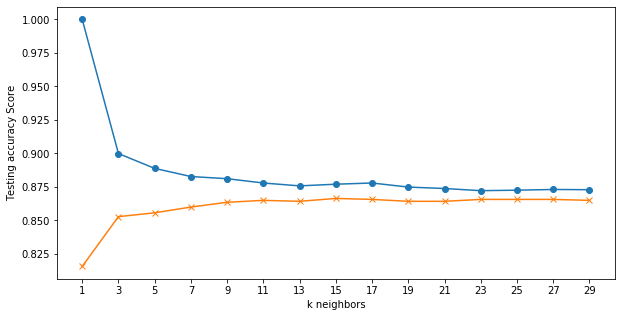

In [9]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []

max_k = 30
k_range = range(1, max_k, 2)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.figure(figsize=(10,5))
plt.plot(k_range, train_scores, marker='o')
plt.plot(k_range, test_scores, marker='x')
plt.xticks(k_range)
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [18]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
print('k=15 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=15 Test Acc: 0.866


In [25]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'knn.sav'
joblib.dump(knn, filename)

['knn.sav']